In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv('/home/dasxgo/dev/analytics-hub/data/Salary Data.csv')
df.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

### **Data preprocessing Part 1**

In [4]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [5]:
df.shape

(375, 6)

In [6]:
# Check the nunmber of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Gender               2
Education Level      3
Job Title          174
dtype: int64

In [7]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

### **Exploratory Data Analysis**

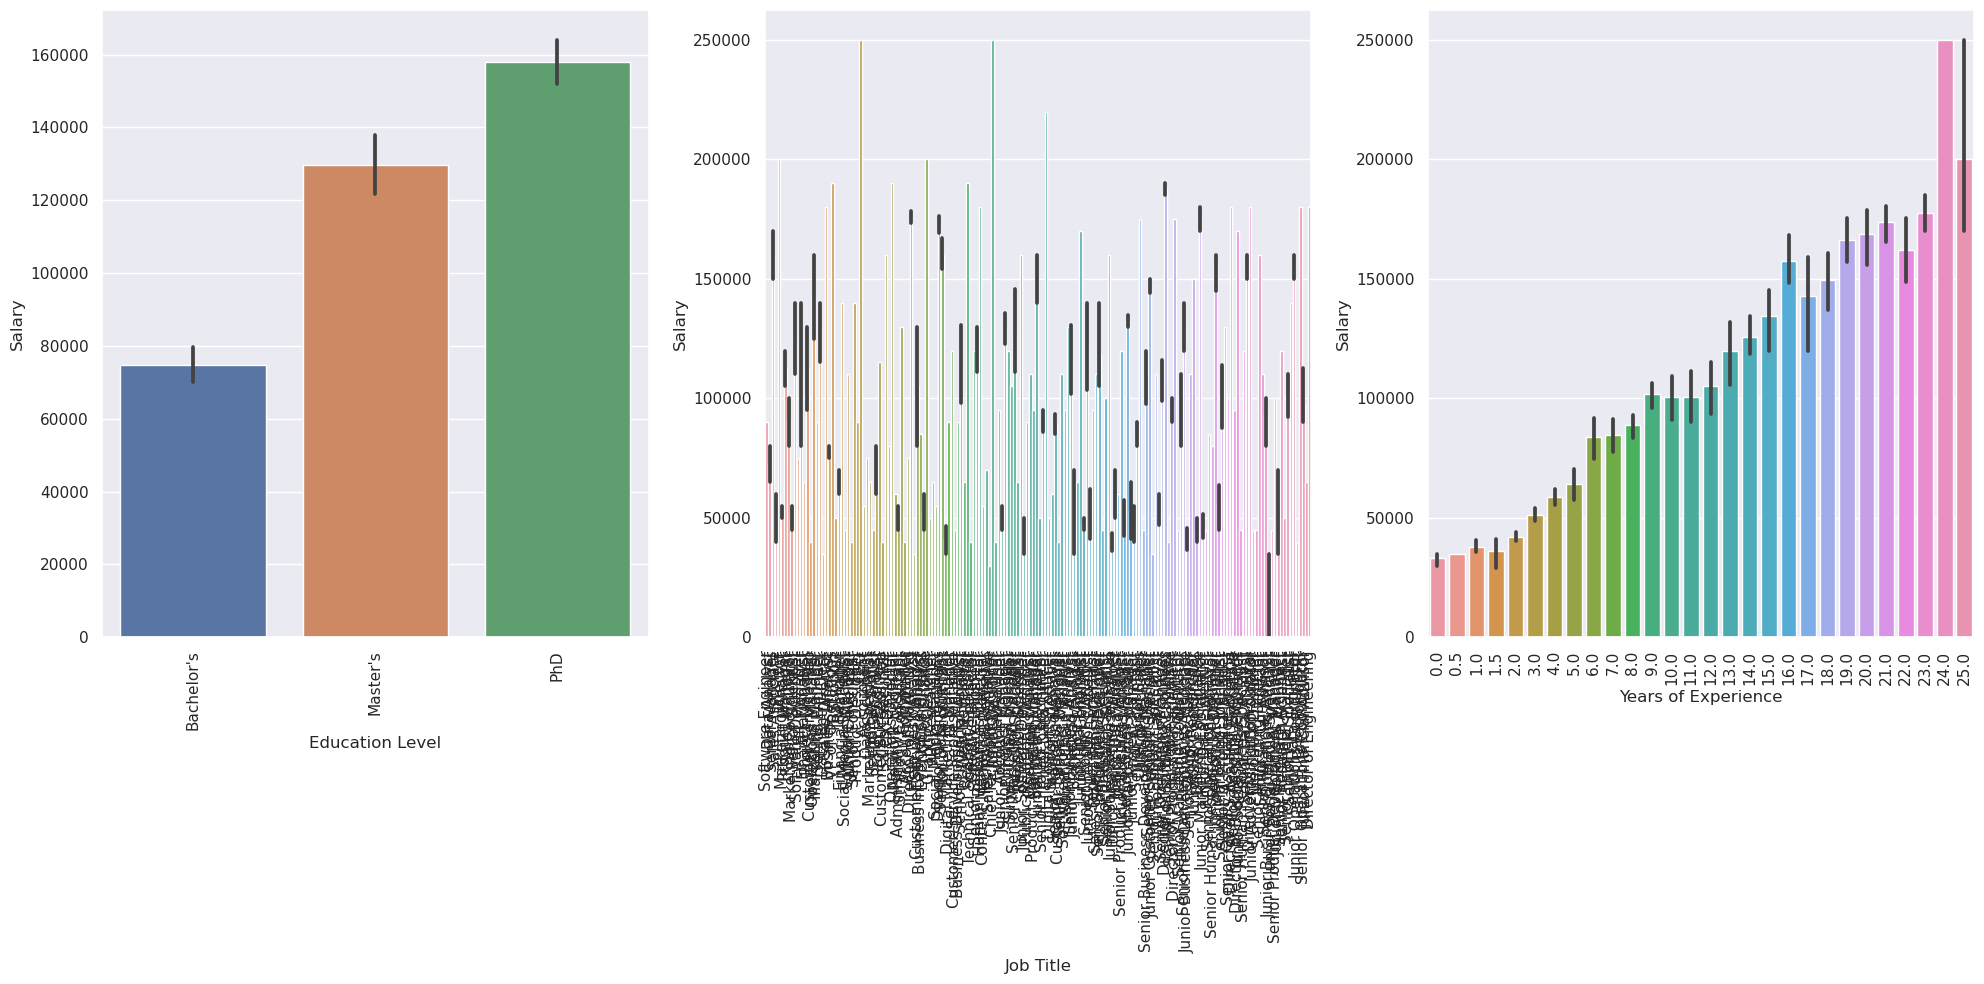

In [8]:
# list cattegorical variables to plot
cat_vars = ['Education Level', 'Job Title', 'Years of Experience']

# Create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
axs = axs.ravel()

# Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Salary', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# ajusting spacing between subplots
fig.tight_layout()

# show plot
plt.show()



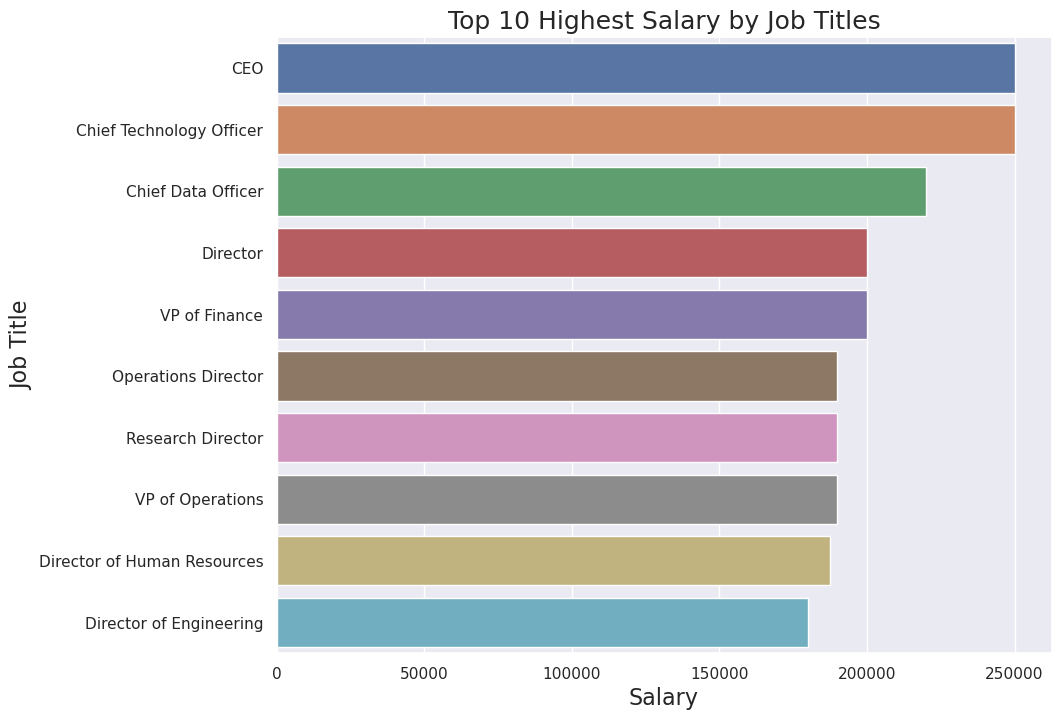

In [9]:
dfjob = df.groupby('Job Title', as_index=False)['Salary'].mean()
dfjob2 = dfjob.nlargest(10,'Salary')

# Show bar plot
plt.figure(figsize=(10,8))
sns.barplot(data=dfjob2, x='Salary', y='Job Title')
plt.title('Top 10 Highest Salary by Job Titles', fontsize=18)
plt.xlabel('Salary', fontsize=16)
plt.ylabel('Job Title', fontsize=16)
plt.show()



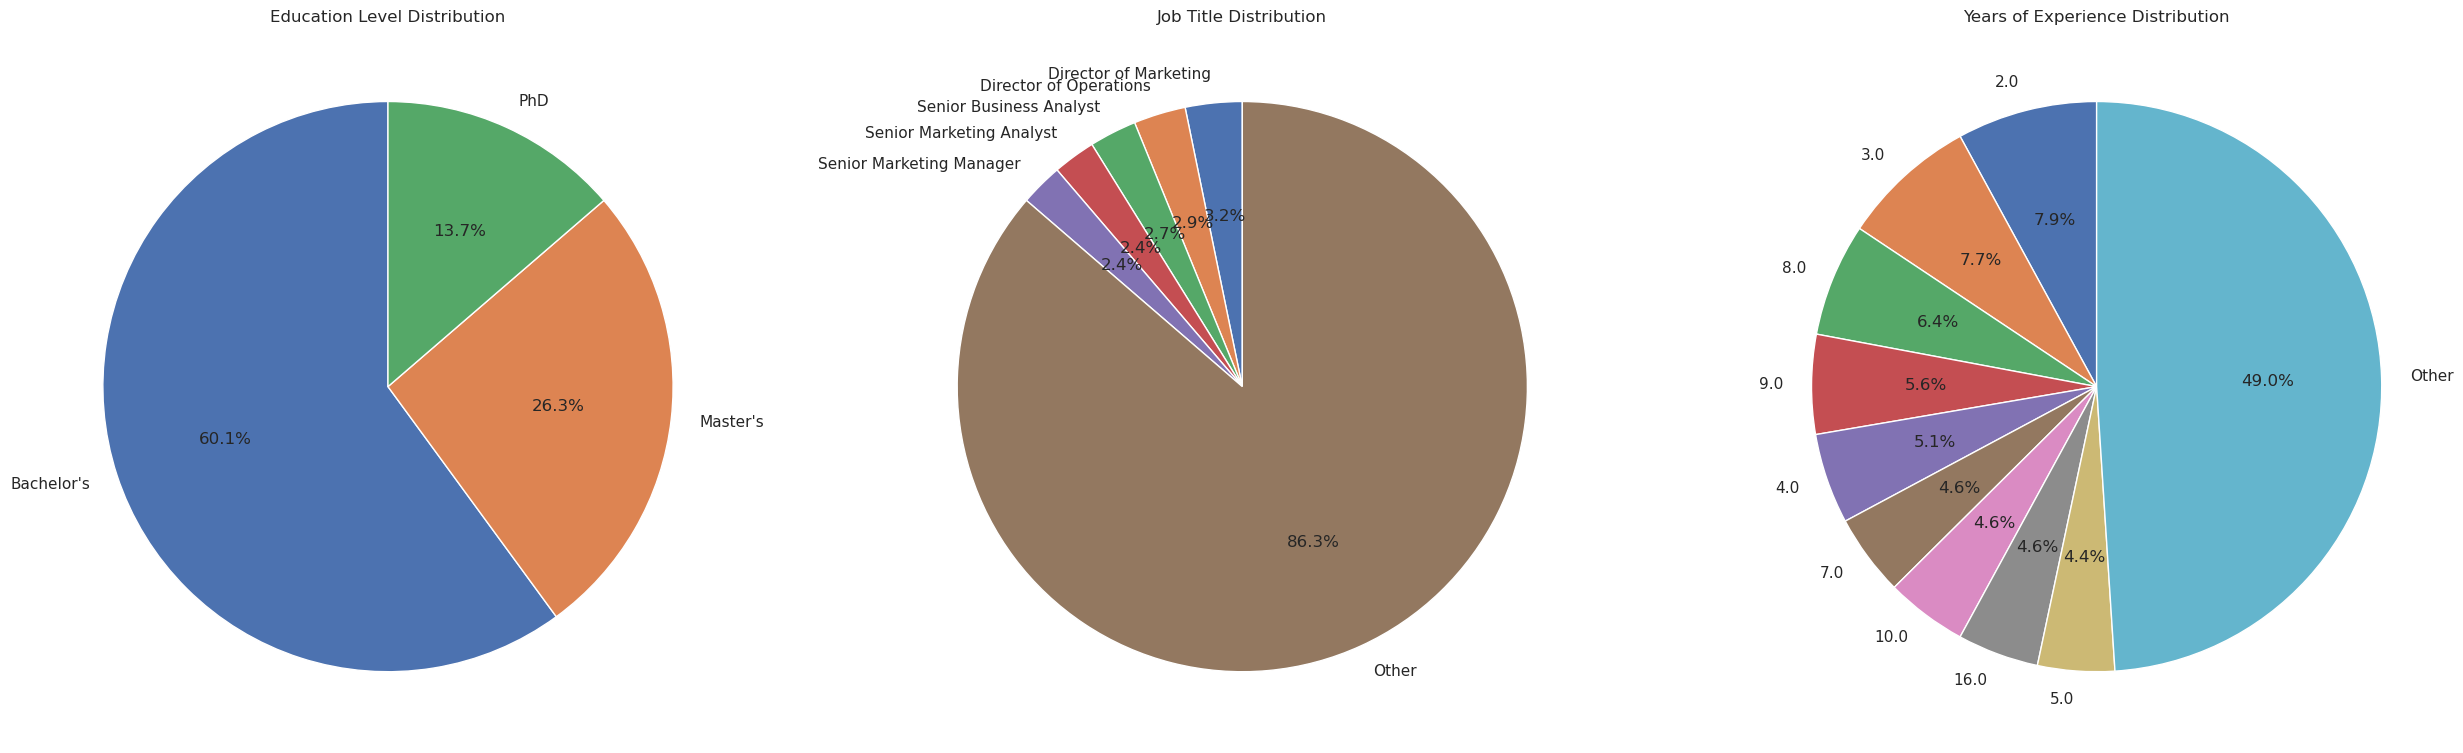

In [11]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Education Level', 'Job Title', 'Years of Experience']

# Create figure and axes
fig, axs = plt.subplots(nrows=1, ncols=len(cat_vars), figsize=(25, 10))

# Create a pie chart for each categorical variable
for var, ax in zip(cat_vars, axs):
    # Count the number of occurrences for each category
    cat_counts = df[var].value_counts()
    # Group categories beyond the top max_categories as 'Other'
    if len(cat_counts) > max_categories:
        cat_counts_top = cat_counts[:max_categories]
        cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
        cat_counts = pd.concat([cat_counts_top, cat_counts_other])  # Concatenate Series
    # Create pie chart
    ax.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
    # Set a title for each subplot
    ax.set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

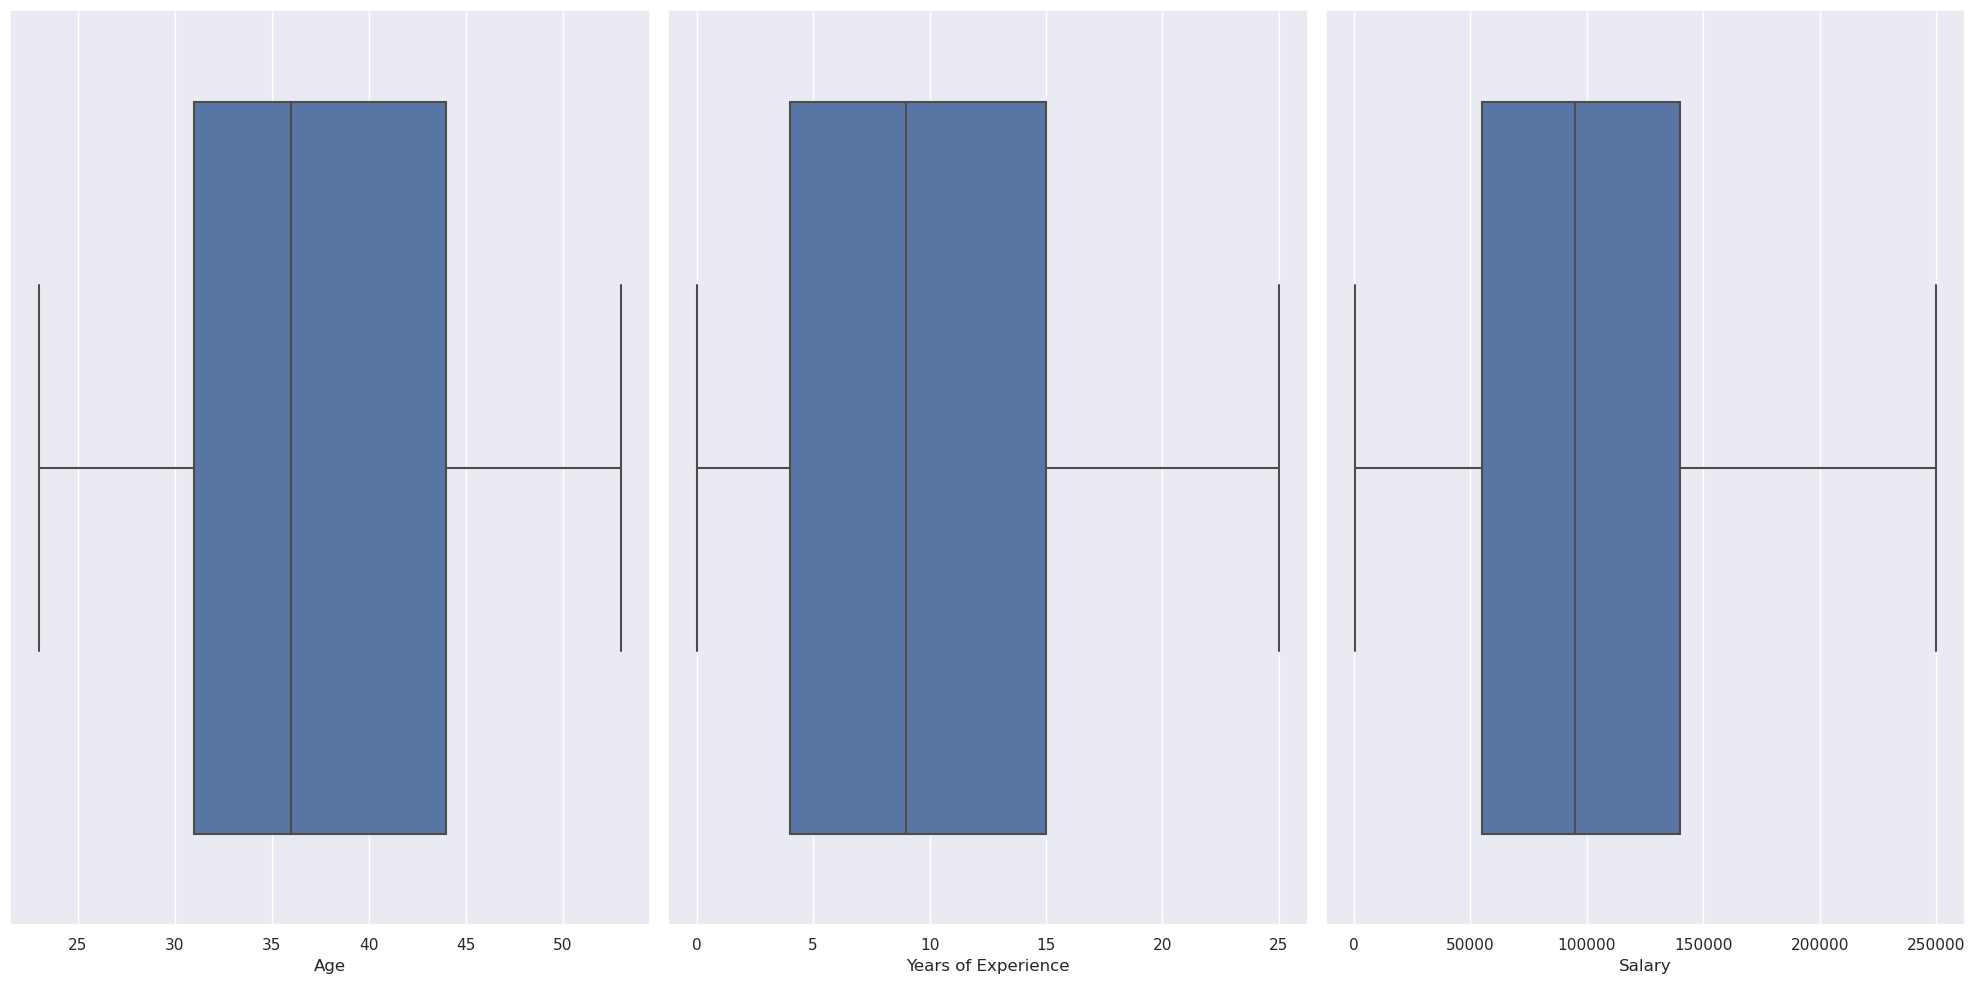

In [12]:
num_vars = ['Age', 'Years of Experience', 'Salary']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
fig.tight_layout()

plt.show()

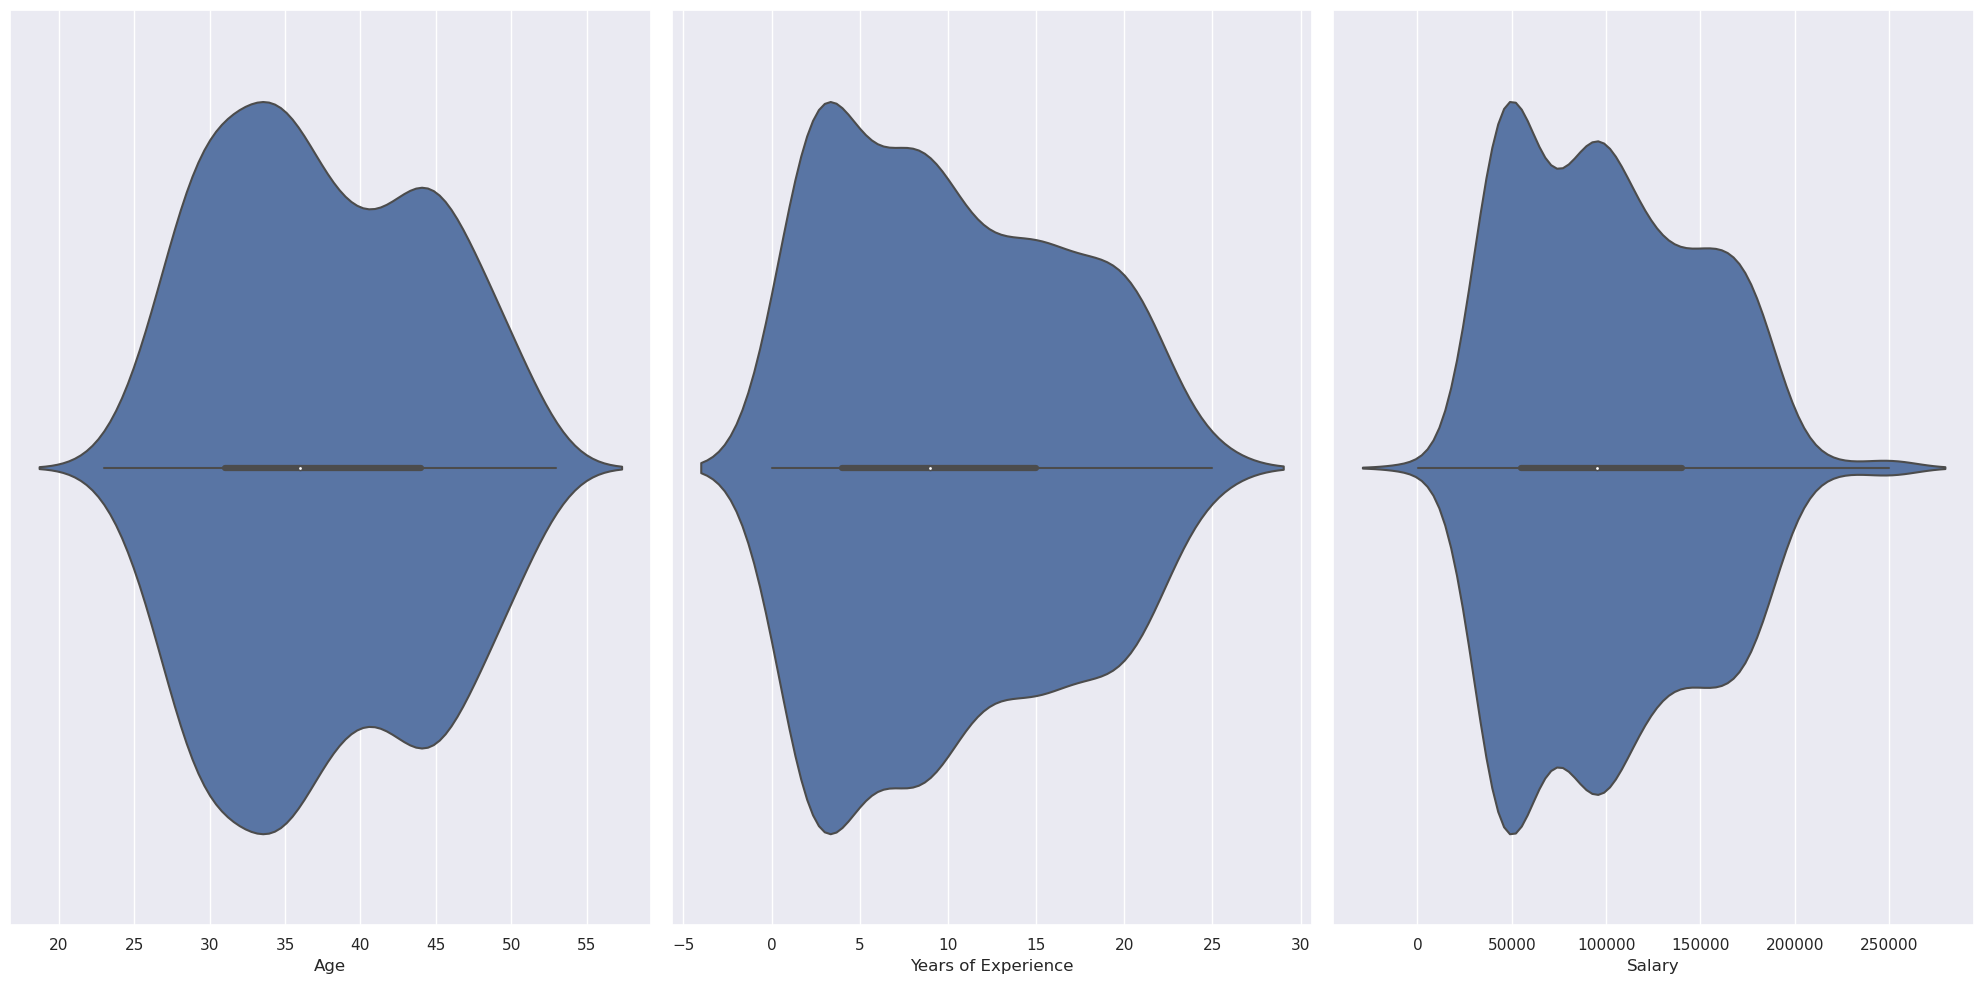

In [13]:
num_vars = ['Age', 'Years of Experience', 'Salary']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])
fig.tight_layout()

plt.show()

### **Data Preprocessing Part 2**

In [14]:
# Check missing value
check_missing = df.isnull().sum()*100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Age                    0.533333
Gender                 0.533333
Education Level        0.533333
Job Title              0.533333
Years of Experience    0.533333
Salary                 0.533333
dtype: float64

In [15]:
df.shape

(375, 6)

In [16]:
df.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

In [17]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [18]:
df.dropna()

Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0  
4                   20.0  200000.0  
..                   ...       ...  
370                  8.0   85000.0  
371                 19.0  170000.0  
372                  2.0   40000.0  
373                  7.0   90000.0  
374                 15.0  150000.0  

[373 rows x 6 columns]

In [19]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [20]:
missing_counts = df.isnull().sum()
df = df.dropna()

In [21]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [22]:
# Check missing value
check_missing = df.isnull().sum()*100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=True)

Series([], dtype: float64)

In [23]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [24]:
df.shape

(373, 6)

In [25]:
# Drop columns that have alot of unique value gender its irrelevant.
df.drop(columns=['Gender', 'Job Title'], inplace = True)
df.head()


Age Education Level  Years of Experience    Salary
0  32.0      Bachelor's                  5.0   90000.0
1  28.0        Master's                  3.0   65000.0
2  45.0             PhD                 15.0  150000.0
3  36.0      Bachelor's                  7.0   60000.0
4  52.0        Master's                 20.0  200000.0

### **Label Encoding for each Object datatype**

In [26]:
for col in df.select_dtypes(include=['object']).columns:
    # Print the column name and the unique values
    print(f'{col}: {df[col].unique()}')

Education Level: ["Bachelor's" "Master's" 'PhD']


In [27]:
from sklearn import preprocessing

# Loop over each column in ttthe Dataframe where dtype is object
for col in df.select_dtypes(include=['object']).columns:
    # Initialize a labelencoder object
    label_encoder = preprocessing.LabelEncoder()
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    # Print the column name and the unique encoded values
    print(f'{col}: {df[col].unique()}')



Education Level: [0 1 2]


### **Correlation HeatMap**

<Axes: >

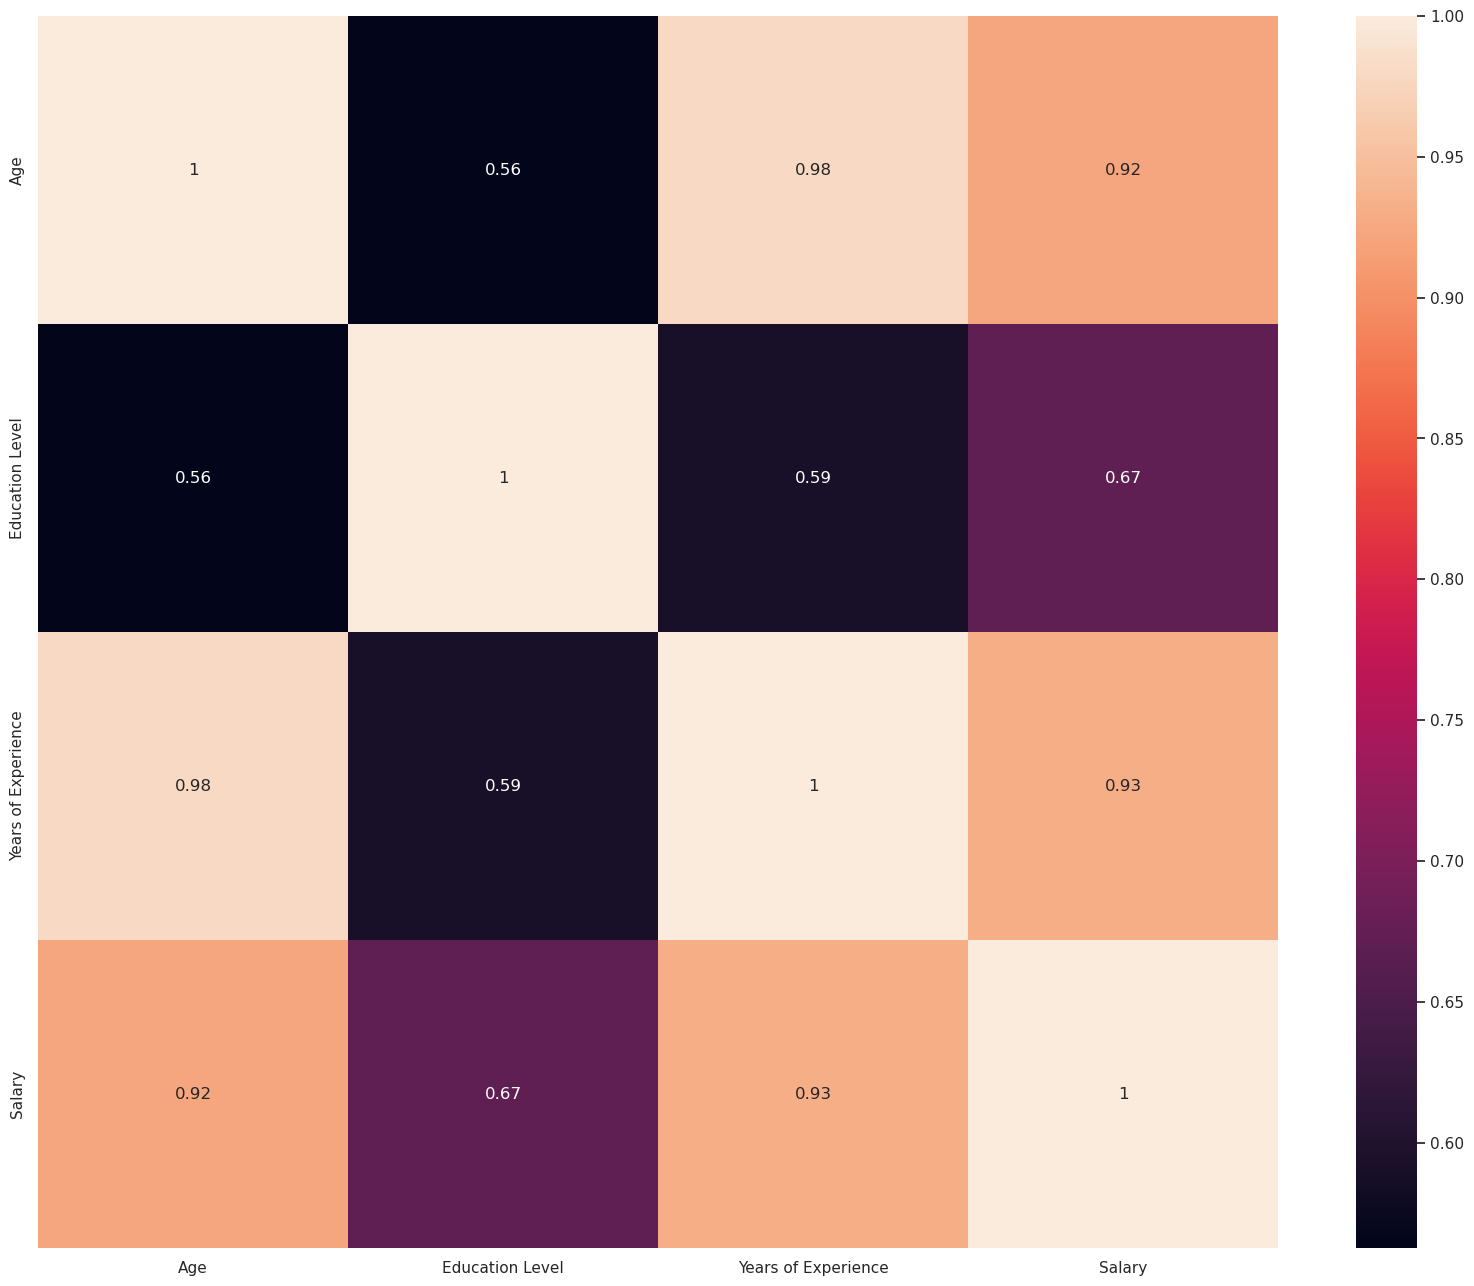

In [28]:
# Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

### **Train test split**

In [29]:
from sklearn.model_selection import train_test_split
# Select the features (x) and the target variable (y)
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split the data into training and test setts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Remove Outlier from Train data using IQR**

In [30]:
# Concatenate X_train and y_train for outlier removal
train_df = pd.concat([X_train, y_train], axis=1)

# Calculate the IQR values for each column
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from X_train
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Separate X_train and y_train after outlier removal
X_train = train_df.drop('Salary', axis=1)
y_train = train_df['Salary']

### **Decision Tree Regressor**

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing

# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune an their values
param_grid = {
    'max_depth' : [2, 4, 6, 8],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf' : [1, 2, 3, 4],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'random_state' : [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best Hyperparameters
print(grid_search.best_params_)


{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'random_state': 42}


/home/dasxgo/mambaforge/envs/eda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dasxgo/mambaforge/envs/eda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dasxgo/mambaforge/envs/eda/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/dasxgo/mambaforge/envs/eda/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    val

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42, max_depth = 6, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 8)
dtree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_split=8,
                      random_state=42)

In [33]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


MAE is 9782.84817927171
MAPE is 0.11092502065201987
MSE is 179988023.25128627
R2 score is 0.911437551158519
RMSE score is 13415.961510502566


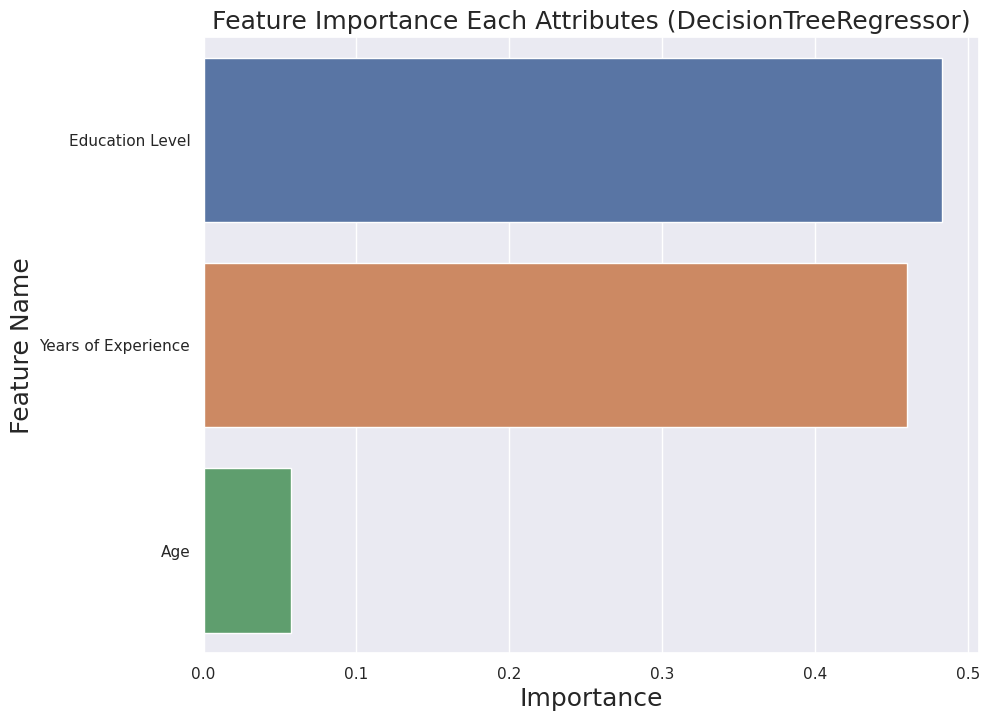

In [34]:
imp_df = pd.DataFrame({
    'Feature Name' : X_train.columns,
    'Importance' : dtree.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (DecisionTreeRegressor)', fontsize=18)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature Name', fontsize=18)
plt.show()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


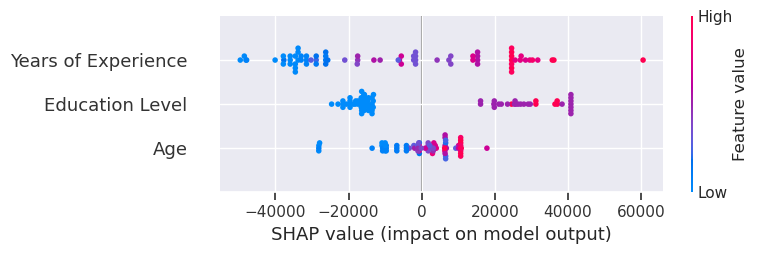

In [35]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

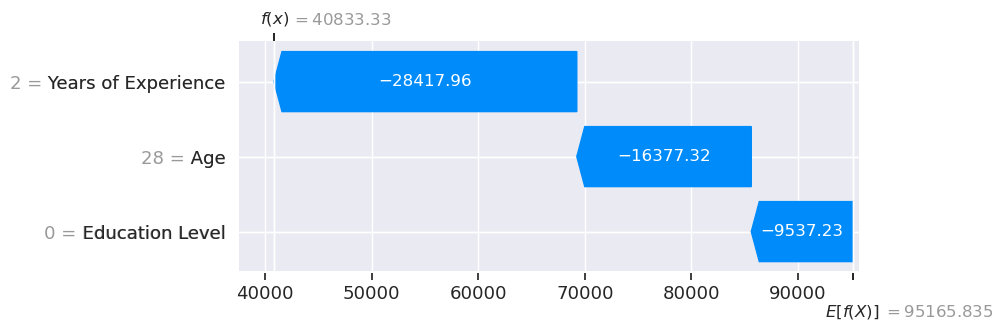

In [37]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

### **Random Forest Regressor**

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameters grid
param_grid = {
    'max_depth' : [3, 5, 7, 9],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt'],
    'random_state' : [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best Hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)



360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dasxgo/mambaforge/envs/eda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dasxgo/mambaforge/envs/eda/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/dasxgo/mambaforge/envs/eda/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/dasxgo/mambaforge/envs/eda/lib/python3.11/site-packages/sklearn/utils/_param_valid

Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = DecisionTreeRegressor(random_state=42, max_depth = 5, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)
rf.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, max_features='sqrt', random_state=42)

In [45]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 9295.288351254294
MAPE is 0.1094012684262492
MSE is 164044264.89772722
R2 score is 0.9192826191692757
RMSE score is 12807.9766121635


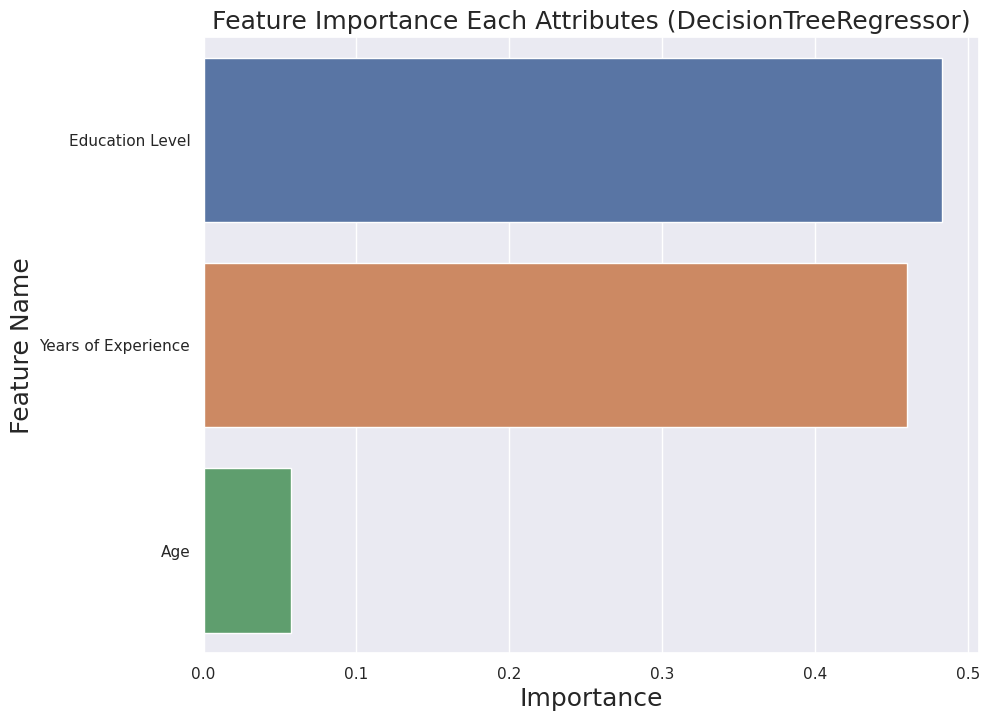

In [46]:
imp_df = pd.DataFrame({
    'Feature Name' : X_train.columns,
    'Importance' : dtree.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (DecisionTreeRegressor)', fontsize=18)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature Name', fontsize=18)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


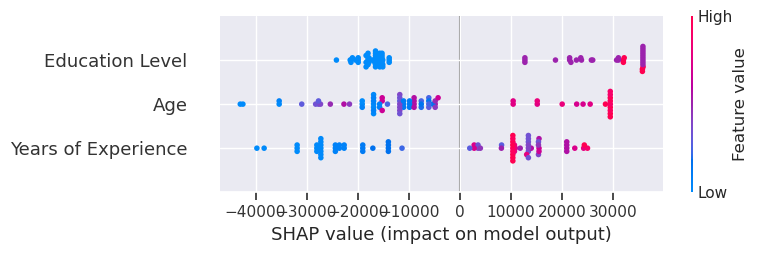

In [47]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

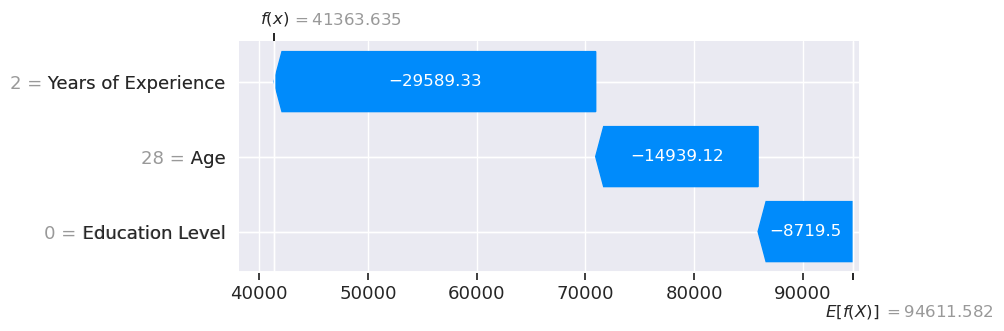

In [49]:
explainer = shap.Explainer(rf, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])